In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
train = pd.read_csv('../data/train_cleaned.csv')

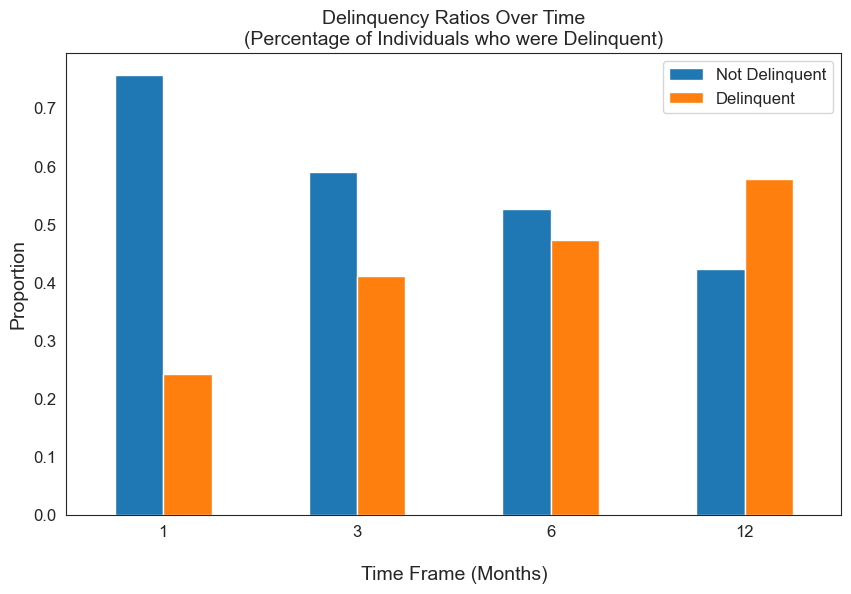

In [282]:
sns.set_style('white')

ratios = pd.concat(
    [train['is_delinquent'].value_counts(normalize=True),
     train['3mo_delinquency'].value_counts(normalize=True),
     train['6mo_delinquency'].value_counts(normalize=True),
     train['12mo_delinquency'].value_counts(normalize=True)
    ],
    axis=1,
).rename(index={0:'Not Delinquent', 1:'Delinquent'}, 
         columns={'is_delinquent': 1, 
                  '3mo_delinquency':3, 
                  '6mo_delinquency':6, 
                  '12mo_delinquency':12}).T

ratios.plot(kind='bar', figsize=(10, 6))
plt.xlabel('\nTime Frame (Months)', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Delinquency Ratios Over Time\n(Percentage of Individuals who were Delinquent)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('../Images/Delinquency-Ratios.png', dpi=300);


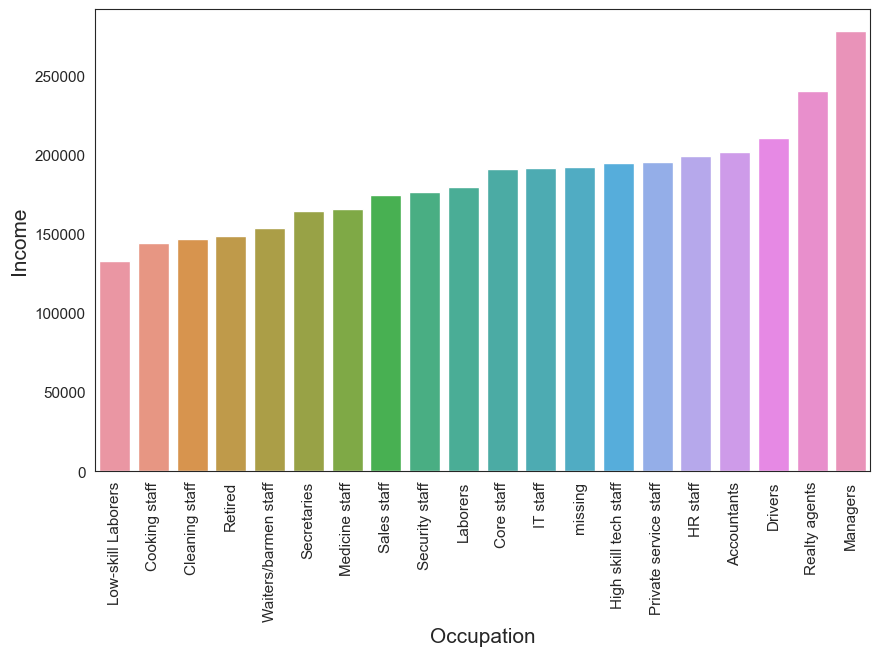

In [197]:
grouped = train.groupby('occupation_type')['amt_income_total'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped)
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Income', fontsize=15)
plt.yticks(fontsize=11)
plt.xticks(rotation=90, fontsize=11)

plt.savefig('../Images/Occupations.png', dpi=300);


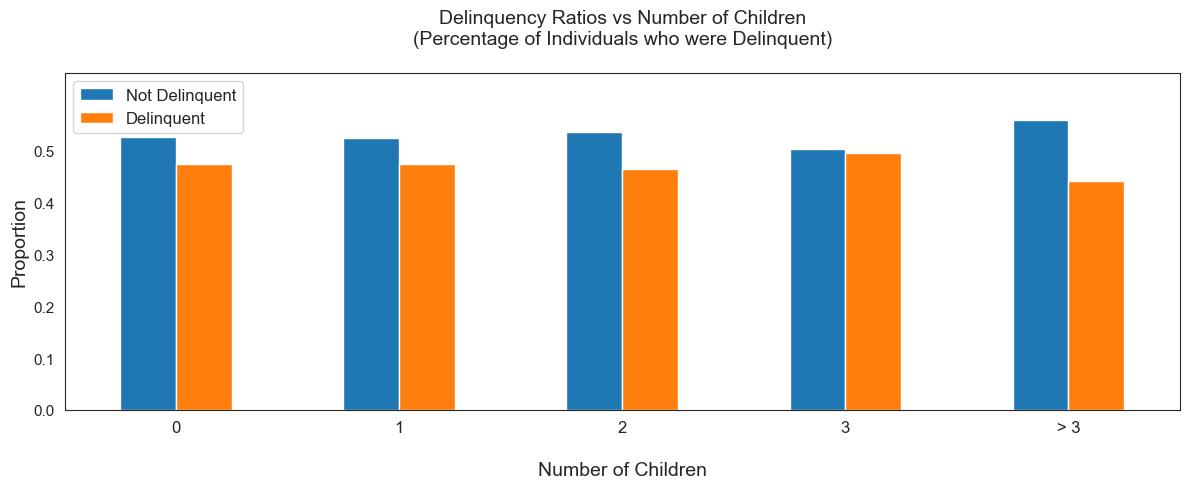

In [292]:
temp = train.copy()
temp['cnt_children'] = np.where(temp['cnt_children']>3, '> 3',temp['cnt_children'])

temp.groupby('cnt_children')['6mo_delinquency']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(12, 5));
labels = ['Not Delinquent', 'Delinquent'] 

plt.legend(labels, loc='best', fontsize=12)
plt.xlabel('\nNumber of Children', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Delinquency Ratios vs Number of Children\n(Percentage of Individuals who were Delinquent)\n', fontsize=14)

yticks=np.arange(0, 0.6, 0.1)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(ticks=yticks, fontsize=11)
plt.ylim(0, 0.65)
plt.savefig('../Images/delinquency-vs-children.png', dpi=300);


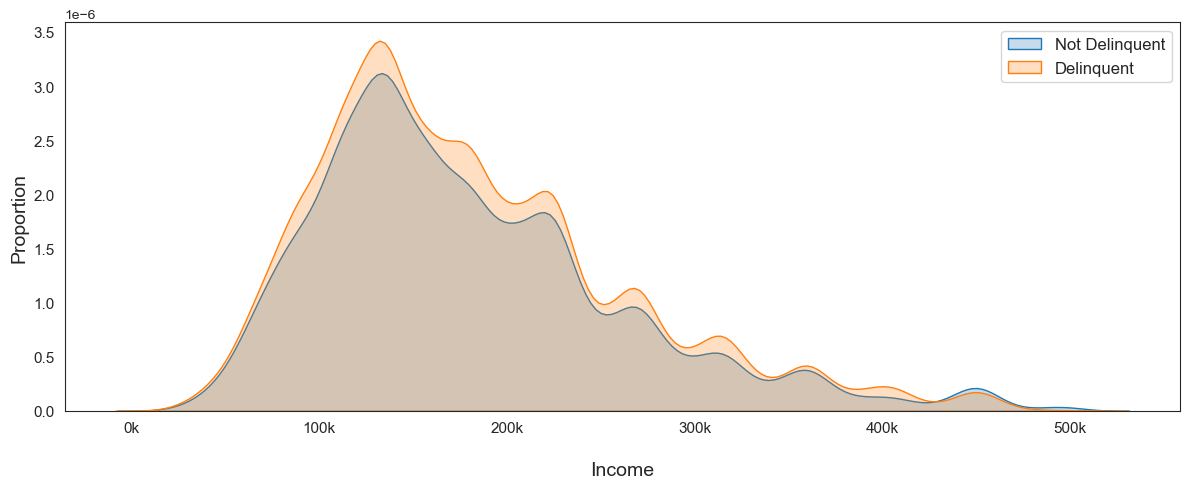

In [293]:
plt.figure(figsize=(12, 5))

sns.kdeplot(train[train['amt_income_total']<0.5e6], x='amt_income_total', hue='6mo_delinquency', fill=True, palette=['#ff7f0e', '#1f77b4'])

ticks=range(0, 600000, 100000)
tick_labels = [f"{int(i/1000)}k" for i in ticks]

plt.legend(labels, loc='best', fontsize=12)
plt.xlabel('\nIncome', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(ticks=ticks, labels=tick_labels, rotation=0, fontsize=11)
plt.yticks(ticks=None, fontsize=11)
plt.savefig('../Images/delinquency-vs-income.png', dpi=300);


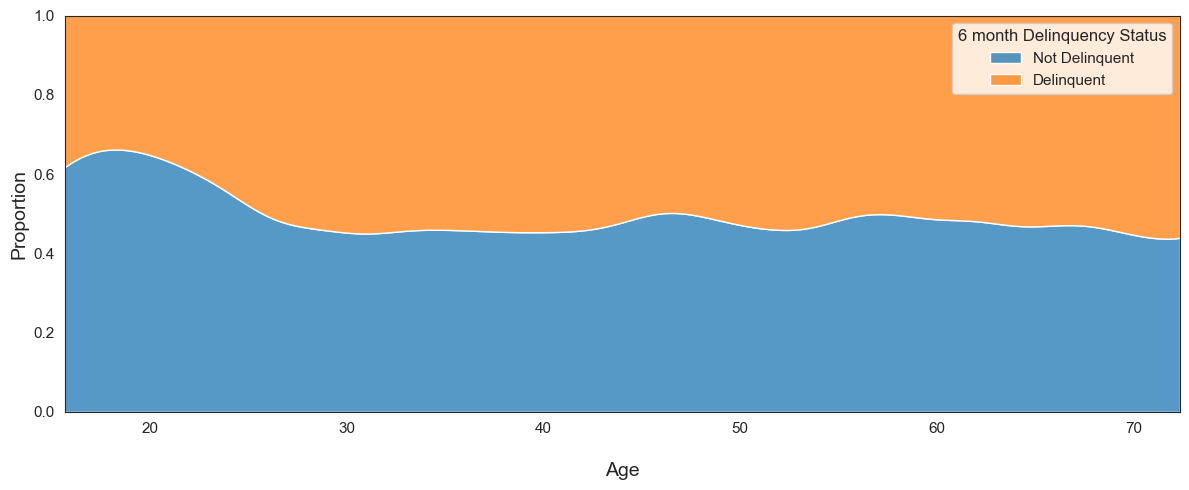

In [294]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=train, x="age", hue="6mo_delinquency", multiple="fill", legend=True, palette=['#ff7f0e', '#1f77b4'])

plt.legend(title="6 month Delinquency Status", 
           labels=["Not Delinquent", "Delinquent"], 
           loc="best", 
           fontsize=11, 
           title_fontsize=12)
plt.xlabel('\nAge', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.savefig('../Images/delinquency-vs-age.png', dpi=300);


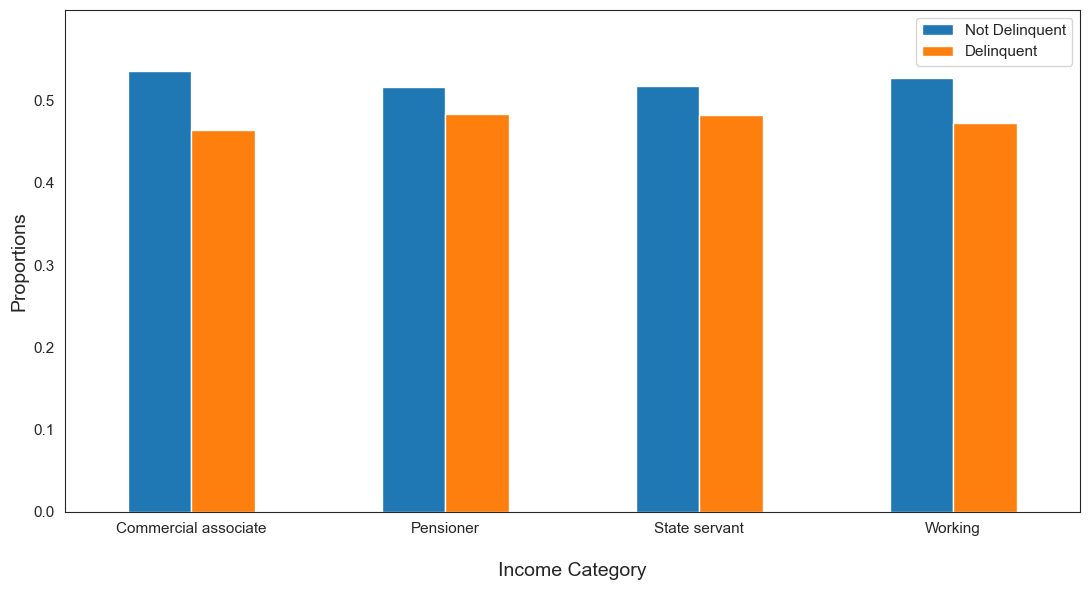

In [300]:
train[train['name_income_type']!='Student'].groupby('name_income_type')['6mo_delinquency']\
        .value_counts(normalize=True).unstack(level = 1)\
        .plot(kind = 'bar', figsize=(11, 6)).legend(loc='best')

labels = ['Not Delinquent', 'Delinquent'] 
yticks=np.arange(0, 0.6, 0.1)

plt.legend(labels= labels, fontsize=11, loc='upper right')

plt.xlabel('\nIncome Category', fontsize=14)
plt.ylabel('Proportions', fontsize=14)
plt.ylim(0,0.61)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(ticks=yticks, fontsize=11)
plt.savefig('../Images/delinquency-vs-income-category.png', dpi=300);

